# Importing Packages and Reading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from skimage import color
from skimage.filters import gaussian, sobel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, AvgPool2D
from tensorflow.keras.callbacks import EarlyStopping
from skimage.restoration import denoise_tv_chambolle
from skimage.feature import canny
from copy import copy

import cv2 as cv
color = sns.color_palette('muted')

In [ ]:
X = np.load('/content/drive/MyDrive/Datasets/Sign Language Images/X.npy')
X.shape

(2062, 64, 64)

In [ ]:
X.max()

1.0

In [ ]:
X.min()

0.003921569

In [ ]:
y = np.load('/content/drive/MyDrive/Datasets/Sign Language Images/Y.npy')
y.shape

(2062, 10)

In [ ]:
print(y[0])
print(y[0].shape)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(10,)


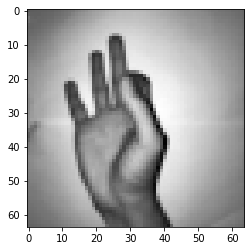

In [ ]:
plt.imshow(X[0], cmap='gray');

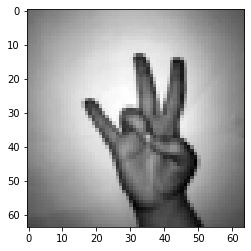

In [ ]:
plt.imshow(X[600], cmap='gray');

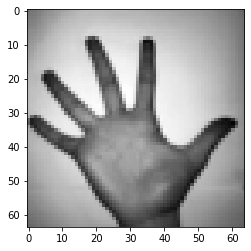

In [ ]:
plt.imshow(X[2000], cmap='gray');

In [ ]:
y_df = pd.DataFrame(y,columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [ ]:
y_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

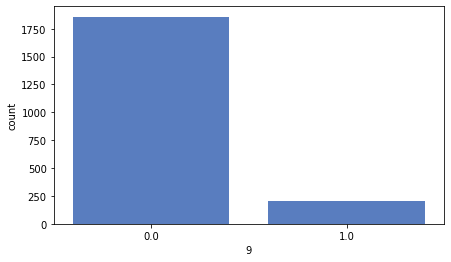

In [ ]:
plt.figure(figsize=(7,4))
for i in y_df.columns:
  sns.countplot(data=y_df, x=i, color=color[0]);

# Improving The Images

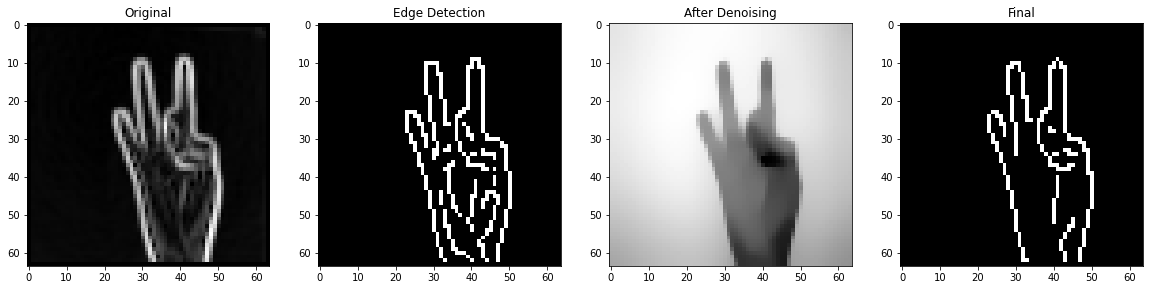

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(sobel(X[1050]), cmap='gray');

plt.subplot(1,4,2)
plt.title('Edge Detection')
plt.imshow(canny(X[1050], sigma=1), cmap='gray');

plt.subplot(1,4,3)
plt.title('After Denoising')
plt.imshow(denoise_tv_chambolle(X[1050]), cmap='gray');

plt.subplot(1,4,4)
plt.title('Final')
plt.imshow(canny(denoise_tv_chambolle(X[1050]), sigma=1), cmap='gray');

In [ ]:
x = copy(X)

for i in range(x.shape[0]):
  x[i] = canny(denoise_tv_chambolle(x[i]), sigma=1)

# Reshaping Features

In [ ]:
x.max()

1.0

In [ ]:
x.min()

0.0

In [ ]:
x_scaled = x.reshape(x.shape[0], 64, 64, 1)

# Splitting The Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=32)

In [ ]:
x_train.shape

(1443, 64, 64, 1)

In [ ]:
x_test.shape

(619, 64, 64, 1)

In [ ]:
y_train.shape

(1443, 10)

# Building The Model

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(64,64,1), padding='same'))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(64,64,1), padding='same'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(64,64,1), padding='same'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 64, 64, 32)        544       
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 16, 16, 32)        16416     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 5, 5, 32)          16416     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 32)              

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
46/46 [==============================] - 6s 118ms/step - loss: 2.1059 - accuracy: 0.1996 - val_loss: 1.4561 - val_accuracy: 0.4717
Epoch 2/50
46/46 [==============================] - 5s 115ms/step - loss: 1.2363 - accuracy: 0.5565 - val_loss: 0.8379 - val_accuracy: 0.7092
Epoch 3/50
46/46 [==============================] - 5s 113ms/step - loss: 0.7229 - accuracy: 0.7436 - val_loss: 0.4783 - val_accuracy: 0.8465
Epoch 4/50
46/46 [==============================] - 5s 112ms/step - loss: 0.3679 - accuracy: 0.8773 - val_loss: 0.2921 - val_accuracy: 0.9128
Epoch 5/50
46/46 [==============================] - 5s 113ms/step - loss: 0.2281 - accuracy: 0.9189 - val_loss: 0.2951 - val_accuracy: 0.9063
Epoch 6/50
46/46 [==============================] - 5s 110ms/step - loss: 0.2593 - accuracy: 0.9189 - val_loss: 0.2589 - val_accuracy: 0.9111
Epoch 7/50
46/46 [==============================] - 5s 116ms/step - loss: 0.1807 - accuracy: 0.9480 - val_loss: 0.2732 - val_accuracy: 0.9144
Epoch 

# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
loss = pd.DataFrame(model.history.history)

In [ ]:
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,1.730720,0.381843,0.907772,0.707593
1,0.726439,0.747748,0.550663,0.828756
2,0.425019,0.868330,0.354751,0.894992
3,0.250357,0.921691,0.291741,0.920840
4,0.145470,0.955648,0.239280,0.917609


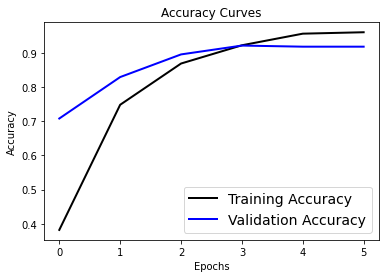

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(model.history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(model.history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12);

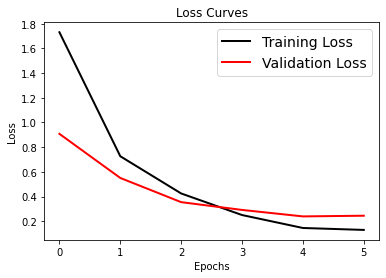

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(model.history.history['loss'], 'black', linewidth=2.0)
plt.plot(model.history.history['val_loss'], 'red', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12);

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
y_test_1 = np.argmax(y_test, axis=-1)

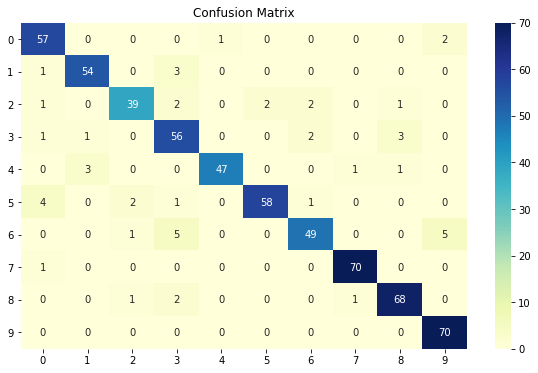

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_1, y_pred), annot=True, cbar=True, cmap="YlGnBu");
plt.yticks(rotation=360);
plt.title('Confusion Matrix');